In [1]:
# Author Mavin
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from math import sqrt
import scipy

import numpy as np

from sklearn.covariance import EmpiricalCovariance, MinCovDet
# Preprocessor
from sklearn.preprocessing import StandardScaler
#Estimators

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
#cross validation
from sklearn.cross_validation import train_test_split

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.decomposition import PCA


### This Data is solely for the EDA part.
credit = pd.read_csv('defaultofcreditcardclients.csv', header =1)
credit.head()

C:\Users\mjian\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,...,Bill_Jun,Bill_May,Bill_Apr,PAYMENT_SEP,PAYMENT_AUG,PAYMENT_JUL,PAMENT_JUN,PAYMENT_MAY,PAYMENT_APR,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
credit.info()
credit.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
STATUS_SEP     30000 non-null int64
STATUS_AUG     30000 non-null int64
STATUS_JUL     30000 non-null int64
STATUS_JUN     30000 non-null int64
STATUS_MAY     30000 non-null int64
STATUS_APR     30000 non-null int64
Bill_SEP       30000 non-null int64
Bill_Aug       30000 non-null int64
Bill_Jul       30000 non-null int64
Bill_Jun       30000 non-null int64
Bill_May       30000 non-null int64
Bill_Apr       30000 non-null int64
PAYMENT_SEP    30000 non-null int64
PAYMENT_AUG    30000 non-null int64
PAYMENT_JUL    30000 non-null int64
PAMENT_JUN     30000 non-null int64
PAYMENT_MAY    30000 non-null int64
PAYMENT_APR    30000 non-null int64
DEFAULT        30000 non-nu

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,...,Bill_Jun,Bill_May,Bill_Apr,PAYMENT_SEP,PAYMENT_AUG,PAYMENT_JUL,PAMENT_JUN,PAYMENT_MAY,PAYMENT_APR,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


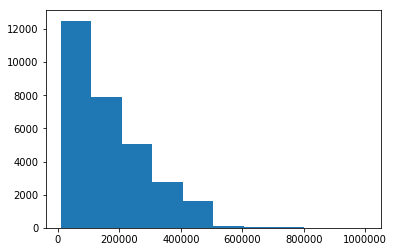

In [3]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

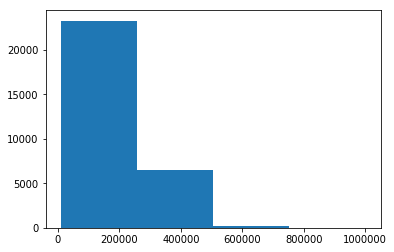

In [4]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

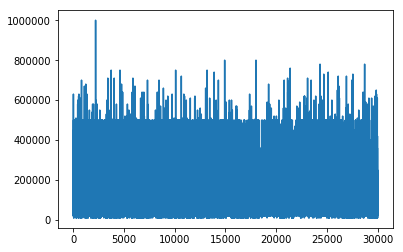

In [5]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [6]:
corrMat = credit.corr()
print(corrMat)

                   ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID           1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL    0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX          0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION    0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE    -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE          0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
STATUS_SEP  -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
STATUS_AUG  -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
STATUS_JUL  -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
STATUS_JUN  -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
STATUS_MAY  -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
STATUS_APR  -0.020270  -0.235195 -0.044008   0.082316  0.034345 -0.048773   

In [7]:
covMat = credit.cov()
print(covMat)

                       ID     LIMIT_BAL          SEX     EDUCATION  \
ID           7.500250e+07  2.941664e+07    78.356379    268.154338   
LIMIT_BAL    2.941664e+07  1.683446e+10  1571.050630 -22474.028945   
SEX          7.835638e+01  1.571051e+03     0.239247      0.005502   
EDUCATION    2.681543e+02 -2.247403e+04     0.005502      0.624651   
MARRIAGE    -1.314525e+02 -7.323670e+03    -0.008014     -0.059184   
AGE          1.491057e+03  1.730767e+05    -0.409726      1.275380   
STATUS_SEP  -2.975726e+02 -3.954593e+04    -0.031685      0.093584   
STATUS_AUG  -1.162770e+02 -4.603765e+04    -0.041442      0.115025   
STATUS_JUL  -1.916922e+02 -4.443225e+04    -0.038694      0.107861   
STATUS_JUN  -2.769132e+01 -4.057181e+04    -0.034411      0.100528   
STATUS_MAY  -2.178600e+02 -3.667056e+04    -0.030521      0.087340   
STATUS_APR  -2.018774e+02 -3.509308e+04    -0.024754      0.074816   
Bill_SEP     1.236447e+07  2.727020e+09 -1211.694332   1372.377644   
Bill_Aug     1.10839

In [8]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'STATUS_SEP',
       'STATUS_AUG', 'STATUS_JUL', 'STATUS_JUN', 'STATUS_MAY', 'STATUS_APR',
       'Bill_SEP', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
       'PAYMENT_SEP', 'PAYMENT_AUG', 'PAYMENT_JUL', 'PAMENT_JUN',
       'PAYMENT_MAY', 'PAYMENT_APR', 'DEFAULT'],
      dtype='object')

In [9]:
## Convert value in SEX to Male/Female from 1/2
credit['SEX'] = credit['SEX'].apply({1:'Male', 2:'Female'}.get)

In [10]:
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

SEX     DEFAULT
Female  0          14349
        1           3763
Male    0           9015
        1           2873
Name: SEX, dtype: int64

In [11]:
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

SEX     DEFAULT
Female  0          14349
        1           3763
Male    0           9015
        1           2873
Name: SEX, dtype: int64

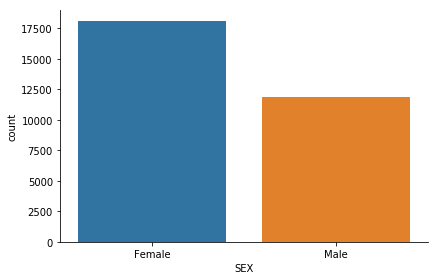

In [12]:
sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)

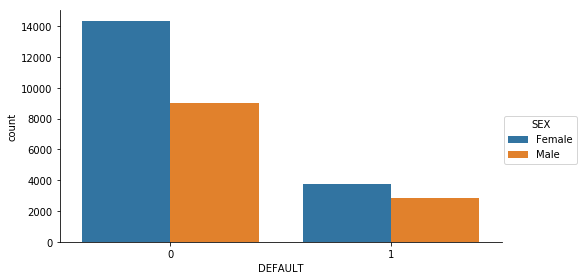

In [13]:
g = sns.factorplot('DEFAULT', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('DEFAULT')

In [14]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,...,Bill_Jun,Bill_May,Bill_Apr,PAYMENT_SEP,PAYMENT_AUG,PAYMENT_JUL,PAMENT_JUN,PAYMENT_MAY,PAYMENT_APR,DEFAULT
0,1,20000,Female,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
## Discretize AGE

credit['AGES']=pd.cut(credit['AGE'], 6)

In [16]:
## Discretize Age with labels
credit['AGEL']=pd.cut(credit['AGE'], 6,labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-79'])

In [17]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null object
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
STATUS_SEP     30000 non-null int64
STATUS_AUG     30000 non-null int64
STATUS_JUL     30000 non-null int64
STATUS_JUN     30000 non-null int64
STATUS_MAY     30000 non-null int64
STATUS_APR     30000 non-null int64
Bill_SEP       30000 non-null int64
Bill_Aug       30000 non-null int64
Bill_Jul       30000 non-null int64
Bill_Jun       30000 non-null int64
Bill_May       30000 non-null int64
Bill_Apr       30000 non-null int64
PAYMENT_SEP    30000 non-null int64
PAYMENT_AUG    30000 non-null int64
PAYMENT_JUL    30000 non-null int64
PAMENT_JUN     30000 non-null int64
PAYMENT_MAY    30000 non-null int64
PAYMENT_APR    30000 non-null int64
DEFAULT        30000 non-n

In [18]:
# credit Grouped by Age
credit.groupby(['AGEL', 'DEFAULT'])['AGEL'].count()

AGEL   DEFAULT
20-30  0          8542
       1          2471
31-40  0          8524
       1          2189
41-50  0          4606
       1          1399
51-60  0          1449
       1           481
61-70  0           225
       1            89
71-79  0            18
       1             7
Name: AGEL, dtype: int64

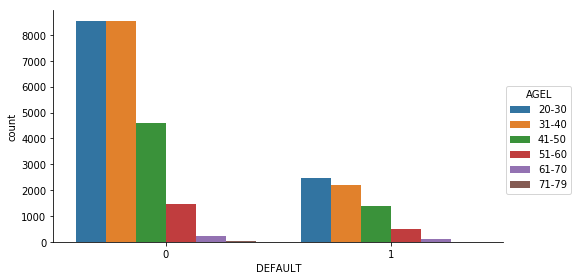

In [19]:
# Default grouped by Age
g = sns.factorplot('DEFAULT', data=credit, hue='AGEL', kind='count', aspect=1.75)
g.set_xlabels('DEFAULT')

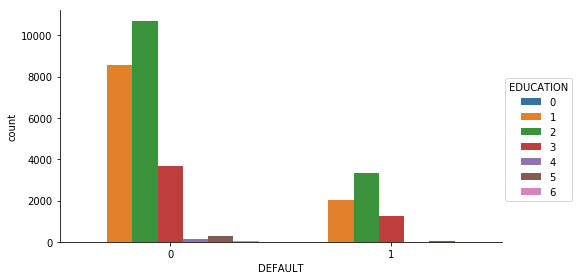

In [20]:
## Plot Education vs Default
# Again use saeborn to group by Sex and class
g = sns.factorplot('DEFAULT', data=credit, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('DEFAULT')

In [21]:
# Default vs MARRIAGE
credit.groupby(['MARRIAGE', 'DEFAULT'])['MARRIAGE'].count()

MARRIAGE  DEFAULT
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: MARRIAGE, dtype: int64

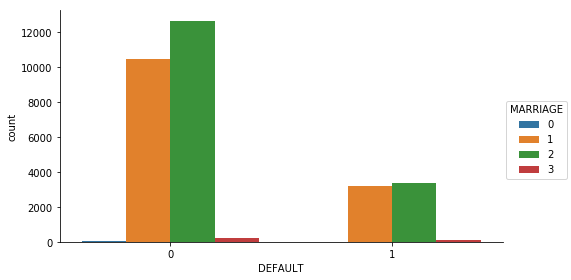

In [22]:
## Plot Marriage vs Default
# Again use saeborn to group by Sex and class
g = sns.factorplot('DEFAULT', data=credit, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('DEFAULT')

In [23]:
# Default vs  lIMIT BAL
credit.groupby(['LIMIT_BAL', 'DEFAULT'])['LIMIT_BAL'].count()

LIMIT_BAL  DEFAULT
10000      0           296
           1           197
16000      0             2
20000      0          1278
           1           698
30000      0          1042
           1           568
40000      0           138
           1            92
50000      0          2480
           1           885
60000      0           592
           1           233
70000      0           521
           1           210
80000      0          1204
           1           363
90000      0           485
           1           166
100000     0           776
           1           272
110000     0           456
           1           132
120000     0           547
           1           179
130000     0           572
           1           157
140000     0           579
           1           170
150000     0           923
                      ... 
580000     1             1
590000     0             5
           1             1
600000     0            13
           1             3
610000   

In [24]:
## Discretize lIMIT BALANCE

credit['LIMIT_BALANCES']=pd.cut(credit['LIMIT_BAL'], 10)

In [25]:
credit.LIMIT_BALANCES

0          (9010.0, 109000.0]
1        (109000.0, 208000.0]
2          (9010.0, 109000.0]
3          (9010.0, 109000.0]
4          (9010.0, 109000.0]
5          (9010.0, 109000.0]
6        (406000.0, 505000.0]
7          (9010.0, 109000.0]
8        (109000.0, 208000.0]
9          (9010.0, 109000.0]
10       (109000.0, 208000.0]
11       (208000.0, 307000.0]
12       (604000.0, 703000.0]
13         (9010.0, 109000.0]
14       (208000.0, 307000.0]
15         (9010.0, 109000.0]
16         (9010.0, 109000.0]
17       (307000.0, 406000.0]
18       (307000.0, 406000.0]
19       (109000.0, 208000.0]
20       (109000.0, 208000.0]
21       (109000.0, 208000.0]
22         (9010.0, 109000.0]
23       (406000.0, 505000.0]
24         (9010.0, 109000.0]
25         (9010.0, 109000.0]
26         (9010.0, 109000.0]
27         (9010.0, 109000.0]
28         (9010.0, 109000.0]
29         (9010.0, 109000.0]
                 ...         
29970    (307000.0, 406000.0]
29971      (9010.0, 109000.0]
29972    (

In [26]:
# Default vs MARRIAGE
credit.groupby(['LIMIT_BALANCES', 'DEFAULT'])['LIMIT_BALANCES'].count()

LIMIT_BALANCES         DEFAULT
(9010.0, 109000.0]     0          8814
                       1          3684
(109000.0, 208000.0]   0          6345
                       1          1535
(208000.0, 307000.0]   0          4247
                       1           812
(307000.0, 406000.0]   0          2371
                       1           388
(406000.0, 505000.0]   0          1404
                       1           194
(505000.0, 604000.0]   0           110
                       1            17
(604000.0, 703000.0]   0            53
                       1             3
(703000.0, 802000.0]   0            19
                       1             3
(901000.0, 1000000.0]  0             1
Name: LIMIT_BALANCES, dtype: int64

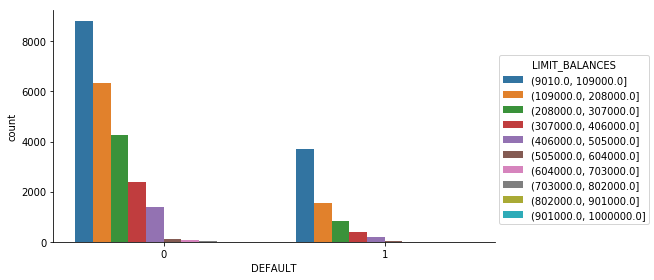

In [27]:
## Plot lIMIT BALANCES vs Default
# Again use saeborn to group by Sex and class
g = sns.factorplot('DEFAULT', data=credit, hue='LIMIT_BALANCES', kind='count', aspect=1.75)
g.set_xlabels('DEFAULT')

In [28]:
## pIVOT TABLE
# dEFAULT BY AGE, SEX, , MARRIAGE, LIMIT BALANCE 
table = pd.crosstab(index=[credit.AGEL,credit.MARRIAGE, credit.SEX], columns=[credit.DEFAULT,credit.LIMIT_BALANCES])

In [29]:
table.unstack()

DEFAULT                         0                                  \
LIMIT_BALANCES (9010.0, 109000.0]       (109000.0, 208000.0]        
SEX                        Female  Male               Female Male   
AGEL  MARRIAGE                                                      
20-30 0                         5     1                    1    1   
      1                       519   146                  322   76   
      2                      2014  1430                 1318  642   
      3                        13     6                    8    3   
31-40 0                         7     3                    6    1   
      1                       796   412                  869  413   
      2                       433   596                  694  450   
      3                        20    16                    8    2   
41-50 0                         3     2                    5    1   
      1                       629   449                  529  332   
      2                       229   269                  169   97   
      3                        40    25                   12    7   
51-60 0                         1     0                    2    1   
      1                       227   199                  132   98   
      2                       102    94                   48   33   
      3                        15    18                    6    1   
61-70 0                         0     0                    0    0   
      1                        34    31                   25   20   
      2                        11    11                    1    6   
      3                         4     1                    0    0   
71-79 0                         0     0                    0    0   
      1                         2     0                    3    2   
      2                         1     0                    1    0   
      3                         0     0                    0    0   

DEFAULT                                                             \
LIMIT_BALANCES (208000.0, 307000.0]      (307000.0, 406000.0]        
SEX                          Female Male               Female Male   
AGEL  MARRIAGE                                                       
20-30 0                           2    0                    0    0   
      1                         143   49                   82   23   
      2                         706  291                  315  169   
      3                           1    1                    0    0   
31-40 0                           3    1                    0    1   
      1                         689  334                  346  249   
      2                         553  333                  297  210   
      3                           4    3                    4    3   
41-50 0                           1    0                    0    0   
      1                         405  260                  230  175   
      2                         128   82                   64   39   
      3                           3    2                    4    0   
51-60 0                           1    0                    0    0   
      1                         109   66                   46   62   
      2                          23   11                   18    8   
      3                           2    0                    2    0   
61-70 0                           0    0                    0    0   
      1                          16   15                    6   12   
      2                           0    4                    0    3   
      3                           0    1                    0    0   
71-79 0                           0    0                    0    0   
      1                           1    4                    1    2   
      2                           0    0                    0    0   
      3                           0    0                    0    0   

DEFAULT                                  ...                     1       \
LIMIT_BALANCES (406000.0, 50500

In [30]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,...,PAYMENT_SEP,PAYMENT_AUG,PAYMENT_JUL,PAMENT_JUN,PAYMENT_MAY,PAYMENT_APR,DEFAULT,AGES,AGEL,LIMIT_BALANCES
0,1,20000,Female,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,"(20.942, 30.667]",20-30,"(9010.0, 109000.0]"
1,2,120000,Female,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,"(20.942, 30.667]",20-30,"(109000.0, 208000.0]"
2,3,90000,Female,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,"(30.667, 40.333]",31-40,"(9010.0, 109000.0]"
3,4,50000,Female,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,"(30.667, 40.333]",31-40,"(9010.0, 109000.0]"
4,5,50000,Male,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,"(50.0, 59.667]",51-60,"(9010.0, 109000.0]"


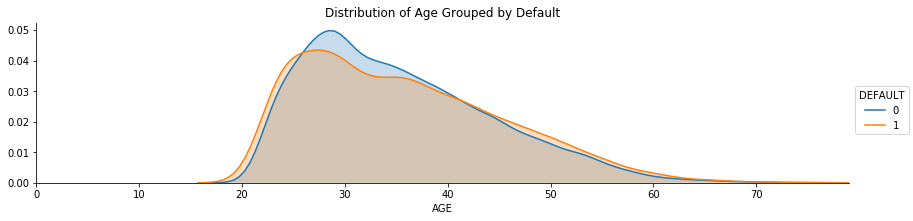

In [31]:
# Age groupd by default

fig =  sns.FacetGrid(credit, hue='DEFAULT', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Default')
fig.add_legend()

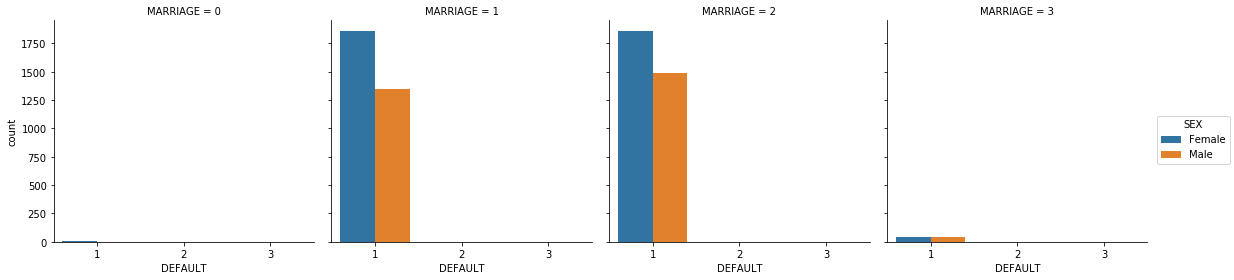

In [32]:
# DEFAULT BY SEX AND AGE  
sns.factorplot('DEFAULT', data=credit, kind='count', hue='SEX', col='MARRIAGE', order=[1,2,3]) 
             #  .hue_order=['child','female','male'], 
               #aspect=2, size=5)

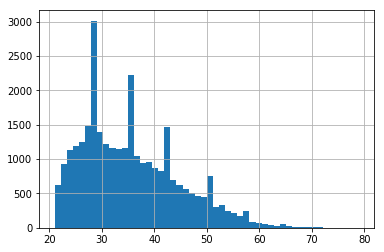

In [33]:
# Another way to plot a histogram of ages is shown below
credit['AGE'].hist(bins=50)

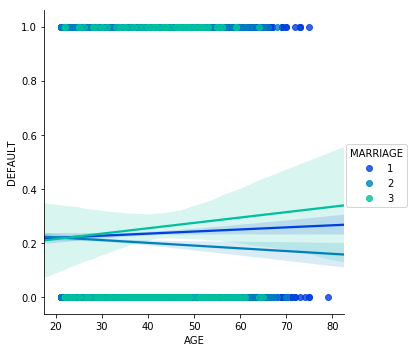

In [34]:
# Default vs. Age gruped by Marriage
sns.lmplot('AGE', 'DEFAULT', hue='MARRIAGE', data=credit, palette='winter', hue_order=range(1,4))

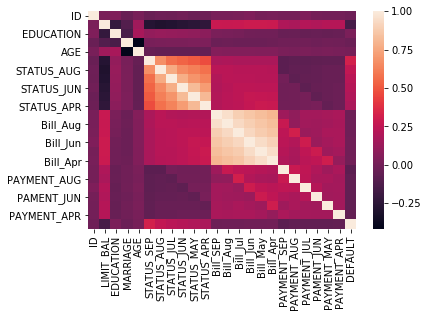

In [35]:
# HeatMap
corr=credit.corr()
sns.heatmap(corr)

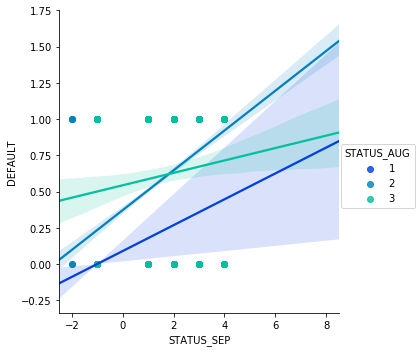

In [36]:
# Default vs. STATUS in Sep vs Status i Aug
sns.lmplot('STATUS_SEP', 'DEFAULT', hue='STATUS_AUG', data=credit, palette='winter', hue_order=range(1,4))

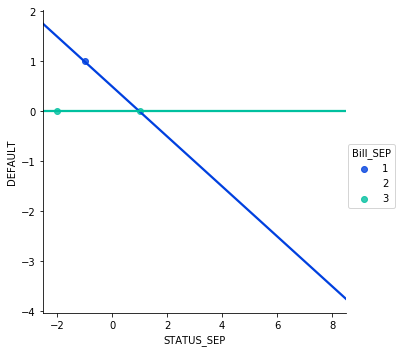

In [37]:
# Default vs. Payment/Bill Apr
sns.lmplot('STATUS_SEP', 'DEFAULT', hue='Bill_SEP', data=credit, palette='winter', hue_order=range(1,4))

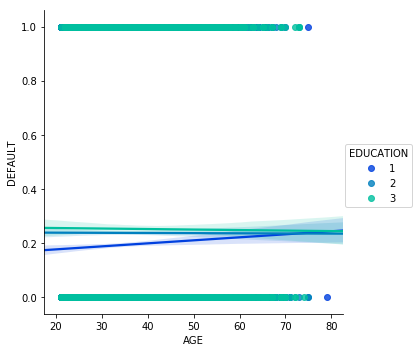

In [38]:
# Default vs. Age gruped by Education
sns.lmplot('AGE', 'DEFAULT', hue='EDUCATION', data=credit, palette='winter', hue_order=range(1,4))

In [39]:
rawData = pd.read_csv('defaultofcreditcardclients_c.csv', header =1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [41]:
# Covariance
covMat = rawData.cov()
print(covMat)


                     ID     LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
ID         7.500250e+07  2.941664e+07    78.356379    268.154338  -131.452515   
LIMIT_BAL  2.941664e+07  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        7.835638e+01  1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION  2.681543e+02 -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -1.314525e+02 -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.491057e+03  1.730767e+05    -0.409726      1.275380    -1.992764   
PAY_0     -2.975726e+02 -3.954593e+04    -0.031685      0.093584     0.011683   
PAY_2     -1.162770e+02 -4.603765e+04    -0.041442      0.115025     0.015122   
PAY_3     -1.916922e+02 -4.443225e+04    -0.038694      0.107861     0.020421   
PAY_4     -2.769132e+01 -4.057181e+04    -0.034411      0.100528     0.020213   
PAY_5     -2.178600e+02 -3.667056e+04    -0.030521      0.087340     0.021074   
PAY_6     -2.018774e+02 -3.5

In [42]:
#
inData=rawData.iloc[:,1:24]
inData.head()
#inData.info()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [43]:
targetData=rawData.iloc[:,rawData.columns.get_loc('DEFAULT')]
targetData.head()
#targetData.info()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [44]:
#Training Set ( Feature space : X Training)
X = pd.DataFrame(inData)
y = targetData

In [45]:
X.head()
X.shape[1]

23

In [46]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [48]:
X_train.head()
X_train.shape , y_train.shape

((21000, 23), (21000,))

In [49]:
y_train.head()

14632    0
5372     0
8154     0
6468     0
10581    0
Name: DEFAULT, dtype: int64

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 14632 to 11590
Data columns (total 23 columns):
LIMIT_BAL    21000 non-null int64
SEX          21000 non-null int64
EDUCATION    21000 non-null int64
MARRIAGE     21000 non-null int64
AGE          21000 non-null int64
PAY_0        21000 non-null int64
PAY_2        21000 non-null int64
PAY_3        21000 non-null int64
PAY_4        21000 non-null int64
PAY_5        21000 non-null int64
PAY_6        21000 non-null int64
BILL_AMT1    21000 non-null int64
BILL_AMT2    21000 non-null int64
BILL_AMT3    21000 non-null int64
BILL_AMT4    21000 non-null int64
BILL_AMT5    21000 non-null int64
BILL_AMT6    21000 non-null int64
PAY_AMT1     21000 non-null int64
PAY_AMT2     21000 non-null int64
PAY_AMT3     21000 non-null int64
PAY_AMT4     21000 non-null int64
PAY_AMT5     21000 non-null int64
PAY_AMT6     21000 non-null int64
dtypes: int64(23)
memory usage: 3.8 MB


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 14632 to 11590
Data columns (total 23 columns):
LIMIT_BAL    21000 non-null int64
SEX          21000 non-null int64
EDUCATION    21000 non-null int64
MARRIAGE     21000 non-null int64
AGE          21000 non-null int64
PAY_0        21000 non-null int64
PAY_2        21000 non-null int64
PAY_3        21000 non-null int64
PAY_4        21000 non-null int64
PAY_5        21000 non-null int64
PAY_6        21000 non-null int64
BILL_AMT1    21000 non-null int64
BILL_AMT2    21000 non-null int64
BILL_AMT3    21000 non-null int64
BILL_AMT4    21000 non-null int64
BILL_AMT5    21000 non-null int64
BILL_AMT6    21000 non-null int64
PAY_AMT1     21000 non-null int64
PAY_AMT2     21000 non-null int64
PAY_AMT3     21000 non-null int64
PAY_AMT4     21000 non-null int64
PAY_AMT5     21000 non-null int64
PAY_AMT6     21000 non-null int64
dtypes: int64(23)
memory usage: 3.8 MB


In [52]:
# preprocessing by scaling the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
S_train = X_train
pca = PCA(n_components=None)# adjust yourself
pca.fit(S_train)
PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[0.28549895 0.17669564 0.06900732 0.06442578 0.04453219 0.04175749
 0.03951356 0.03840053 0.03753791 0.033048   0.03076764 0.0300926
 0.02505107 0.02278833 0.01762859 0.01149073 0.01069103 0.00823679
 0.00579015 0.00311648 0.00184069 0.00108806 0.00100049]
[371.34349767 292.13694036 182.56651794 176.4019553  146.65962718
 142.01714064 138.14864715 136.18905262 134.65069189 126.34154659
 121.90475813 120.56005367 109.99847557 104.91312586  92.27463604
  74.49847039  71.85934531  63.07431825  52.88328794  38.79768851
  29.81699182  22.92445911  21.98266497]


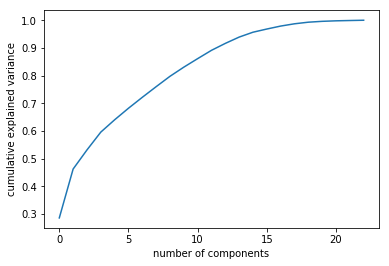

In [54]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

[0.28549895 0.17669564 0.06900731 0.06442575 0.04453217 0.04175734]
[371.34349767 292.13694035 182.56651404 176.40191914 146.65960742
 142.01688313]


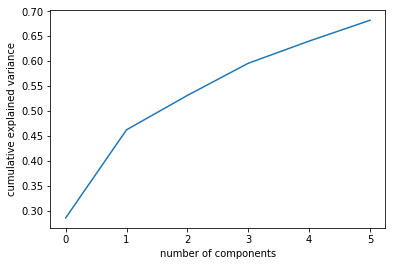

In [55]:
pcan = PCA(n_components=6)# Using 6 components as that would give me a variance > 4%
pcan.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)
print(pcan.explained_variance_ratio_)  
print(pcan.singular_values_)
plt.plot(np.cumsum(pcan.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
X_t_train = pcan.transform(X_train)
X_t_test = pcan.transform(X_test)
clfSVC = SVC()

In [56]:
# SVC
clfSVC.fit(X_t_train, y_train)
print ('score', clfSVC.score(X_t_test, y_test))
print('pred label', clfSVC.predict(X_t_test))

score 0.8074444444444444
pred label [0 0 0 ... 0 0 0]


In [57]:
y_pred = clfSVC.predict(X_t_test)  

In [58]:
# Confusion matrix/Cohen Kappa/Classification report for SVC
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))  
print('Cohen Kappa score')
print(cohen_kappa_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred)) 

Confusion Matrix
[[6719  300]
 [1433  548]]
Cohen Kappa score
0.2942924790047827
Classification report
             precision    recall  f1-score   support

          0       0.82      0.96      0.89      7019
          1       0.65      0.28      0.39      1981

avg / total       0.79      0.81      0.78      9000



In [59]:
clKNN=KNeighborsClassifier(n_neighbors=5)  
clKNN.fit(X_t_train, y_train)
print ('score', clKNN.score(X_t_test, y_test))
print('pred label', clKNN.predict(X_t_test))

score 0.7875555555555556
pred label [0 0 0 ... 0 0 1]


In [60]:
y_pred =clKNN.predict(X_t_test)

In [61]:
# Confusion matrix/Cohen Kappa/Classification report for Knn (before tuning)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))  
print('Cohen Kappa score')
print(cohen_kappa_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred)) 

Confusion Matrix
[[6456  563]
 [1349  632]]
Cohen Kappa score
0.278472716935136
Classification report
             precision    recall  f1-score   support

          0       0.83      0.92      0.87      7019
          1       0.53      0.32      0.40      1981

avg / total       0.76      0.79      0.77      9000



In [62]:
# Find Mean Error
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_t_train, y_train)
    pred_i = knn.predict(X_t_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

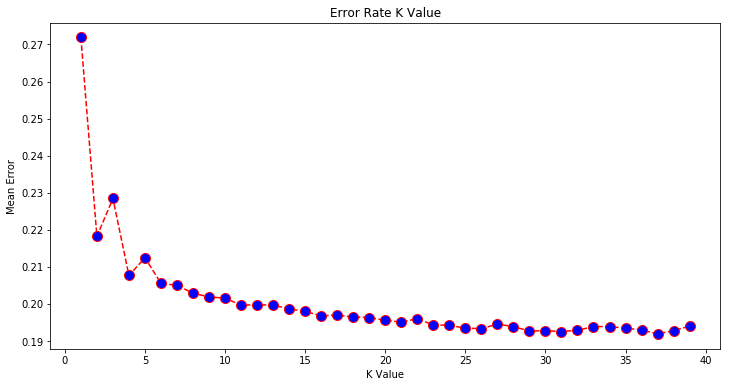

In [63]:
# Plot error against K values
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [64]:
# Random Forest
clrf= RandomForestClassifier(n_jobs=2, random_state=0)
clrf.fit(X_t_train, y_train)
print ('score', clrf.score(X_t_test, y_test))
print('pred label', clrf.predict(X_t_test))

score 0.79
pred label [0 0 0 ... 0 0 0]


In [65]:
y_pred =clrf.predict(X_t_test)

In [66]:
# Confusion matrix/Cohen Kappa/Classification report for rf
print('Confusion Matrix For RF')
print(confusion_matrix(y_test, y_pred))  
print('Cohen Kappa score')
print(cohen_kappa_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred)) 

Confusion Matrix For RF
[[6591  428]
 [1462  519]]
Cohen Kappa score
0.24734466649669606
Classification report
             precision    recall  f1-score   support

          0       0.82      0.94      0.87      7019
          1       0.55      0.26      0.35      1981

avg / total       0.76      0.79      0.76      9000



In [67]:
# Tuning KNN
clKNN=KNeighborsClassifier(n_neighbors=29)  
clKNN.fit(X_t_train, y_train)
print ('score', clKNN.score(X_t_test, y_test))
print('pred label', clKNN.predict(X_t_test))

score 0.8073333333333333
pred label [0 0 0 ... 0 0 0]


In [68]:
y_pred =clKNN.predict(X_t_test)

In [69]:
# Confusion matrix/Cohen Kappa/Classification report for knn after tuning
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))  
print('Cohen Kappa score')
print(cohen_kappa_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred)) 

Confusion Matrix
[[6676  343]
 [1391  590]]
Cohen Kappa score
0.3073067816024303
Classification report
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      7019
          1       0.63      0.30      0.40      1981

avg / total       0.78      0.81      0.78      9000



In [70]:
## Tuning SVC
from sklearn.cross_validation import cross_val_score
clSVCT= SVC(kernel='rbf', gamma=1)

In [71]:
clSVCT.fit(X_t_train, y_train)
print ('score', clSVCT.score(X_t_test, y_test))
print('pred label', clSVCT.predict(X_t_test))
## Score dropped so original SVC was better

score 0.8068888888888889
pred label [0 0 0 ... 0 0 0]


In [72]:
#tuning RF
clrf= RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=300)
clrf.fit(X_t_train, y_train)
print ('score', clrf.score(X_t_test, y_test))
print('pred label', clrf.predict(X_t_test))

score 0.801
pred label [0 0 0 ... 0 0 0]


In [73]:
y_pred =clrf.predict(X_t_test)

In [74]:
# Confusion matrix/Cohen Kappa/Classification report for rf tuned
print('Confusion Matrix For RF')
print(confusion_matrix(y_test, y_pred))  
print('Cohen Kappa score')
print(cohen_kappa_score(y_test, y_pred))
print('Classification report')
print(classification_report(y_test, y_pred)) 

Confusion Matrix For RF
[[6586  433]
 [1358  623]]
Cohen Kappa score
0.30368867457988047
Classification report
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      7019
          1       0.59      0.31      0.41      1981

avg / total       0.78      0.80      0.78      9000

